# Getting Started with Pandas

Pandas sera la primera libreria de interes a lo largo del resto del libro. Pandas contiene estructuras de datos de alto nivel y herramientas de manipulacion diseñadas para realizar analisis de datos en forma facil y rapida en Python. Pandas se encuentra construido sobre NumPy.

Para el resto del libro se utilizara la siguiente convencion de importacion para pandas:
    
from pandas import Series,DataFrame

import pandas as pd

# Introduction to Pandas Data Structures

In [66]:
from pandas import Series,DataFrame #Esta importacion permitira "llamar" a estas estructuras de datos de la forma Series y DataFrame, No va a ser necesario colocar pd.Series o pd.DataFrame
import pandas as pd
import numpy as np

Para comenzar con Pandas es necesario estar confortable con dos estructuras de datos:

1) Series

2) DataFrame

## Series

Una Serie es un objeto unidimensional tipo array que contiene:
    
1. Un array de datos(de cualquier tipo de datos de NumPy)

2. Un array de etiquetas asociado, el cual se denomina Indice

La Serie mas simple es formada por solo un array de datos:

In [67]:
obj = Series([4,7,-5,3]) #Creo una serie en forma manual por medio del comando Series

In [68]:
obj #Visualizo la serie

0    4
1    7
2   -5
3    3
dtype: int64

La representacion de la Serie muestra en forma interactiva el indice (index) a la izquierda y los valores (values) a la derecha.

Ya que no especificamos un indice para los datos el mismo se forma y es creado por default con numeros enteros desde 0 a N-1 (donde N es la longitud de los datos).

Se puede acceder a la representacion del array de datos y el objeto de indices respectivamente por medio de los atributos "values" e "index" 

In [69]:
obj.values #Obtengo los valores de la Serie

array([ 4,  7, -5,  3], dtype=int64)

In [70]:
obj.index #Obtengo los indices de la Serie

RangeIndex(start=0, stop=4, step=1)

A veces es deseable crear una Serie con un indice particular identificando cada dato: 

In [71]:
obj2 = Series([4,7,-5,3],index=["d","b","a","c"]) #Creo una Serie en forma manual y especifico un indice particular

In [72]:
obj2 #Visualizo la Serie

d    4
b    7
a   -5
c    3
dtype: int64

In [73]:
obj2.values #Obtengo los valores de la Serie

array([ 4,  7, -5,  3], dtype=int64)

In [74]:
obj2.index #Obtengo los indices de la serie. Observar que los indices que devuelve son aquellos especificados cuando se creo la Serie

Index(['d', 'b', 'a', 'c'], dtype='object')

Comparado con el array regular de NumPy, se pueden utilizar los valores del indice cuando se quiera seleccionar un valor singular o un set de valores:

In [75]:
obj2["a"] #Selecciono el dato con indice asociado "a"

-5

In [76]:
obj2["d"] #Selecciono el dato con indice asociado "d"

4

In [77]:
obj2[["c","a","d"]] #Selecciono los datos con indice asociado "c","a" y "d"

c    3
a   -5
d    4
dtype: int64

Las operaciones sobre array de NumPy, tales como filtrado con un array booleano, multiplicacion escalar o aplicando funciones matematicas, preservan el link indice-valor:

In [78]:
obj2 #Visualizo el array creado anteriormente

d    4
b    7
a   -5
c    3
dtype: int64

In [79]:
obj2[obj2>0] #Visualizo aquellos elementos de la Serie que son mayores a cero

d    4
b    7
c    3
dtype: int64

In [80]:
obj2 * 2 #Multiplico la Serie por el escalar 2

d     8
b    14
a   -10
c     6
dtype: int64

In [81]:
np.exp(obj2) #Utilizo la serie como exponente de exp

d      54.598150
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

Otra forma de pensar a la Serie es un diccionario ordenado de largo fijo que mapea valores de indice a valores de datos. De esta forma se pueden utilizar varias funciones que son esperadas en los diccionarios:

In [82]:
"b" in obj2 #¿Se encuentra el objeto "b" en la Serie obj2?  Devuelve un booleano True/False

True

In [83]:
"e" in obj2

False

Se pueden tener datos contenidos en un diccionario de Python y se puede crear una Serie "pasando" el diccionario:

In [84]:
sdata = {"Ohio":35000,"Texas":71000,"Oregon":16000,"Utah":5000} #Creo un diccionario donde la clave es el nombre de la ciudad y el valor la poblacion

In [85]:
obj3 = Series(sdata) #Utilizo el diccionario para crear una Serie

In [86]:
obj3 #Visualizo la Serie

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

Cuando solo pasamos un diccionario, el indice resultante en la Serie va a tener las claves del diccionario anterior:

In [87]:
states = {"California","Ohio","Oregon","Texas"}

In [88]:
obj4 = Series(sdata,index=states) #Para crear la Serir utilizo el valor del diccionario sdata y los indices del diccionario states

In [89]:
obj4

California        NaN
Texas         71000.0
Ohio          35000.0
Oregon        16000.0
dtype: float64

En el caso anterior 3 valores que se encuentran en el diccionario "sdata" son colocados en lugares apropiados de la serie, pero como no se encuentra valor para "California" entonces se muestra como NaN (not a number), el cual es considerado por Pandas para marcar los valores perdidos o valores NA

Se utilizaran los terminos "missing" o "NA" para referir a los datos perdidos.

Las funciones "isnull" y "notnull" seran utilizadas en Pandas para detectar valores perdidos (missing data):

In [90]:
pd.isnull(obj4) #¿Existen valores nulos en la Serie obj4? Devuelve una serie con valores Booleanos True si existe NaN

California     True
Texas         False
Ohio          False
Oregon        False
dtype: bool

In [91]:
obj4.isnull() #Funcion insull() como metodo

California     True
Texas         False
Ohio          False
Oregon        False
dtype: bool

In [92]:
obj4.isnull().sum() #Sumo la cantidad de valores nulos

1

In [93]:
pd.isnull(obj4) # Devuelve una serie con valores Booleanos True si NO existe NaN. Da resultado inverso a la funcion isnull()

California     True
Texas         False
Ohio          False
Oregon        False
dtype: bool

In [94]:
obj4.notnull() #Funcion notnull() como metodo

California    False
Texas          True
Ohio           True
Oregon         True
dtype: bool

In [95]:
obj4.notnull().sum() #Sumo la cantidad de valores NO nulos

3

Una caracteristica critica de la Serie para muchas aplicaciones es la alineacion automatica para datos indexados en forma diferente al momento de realizar operaciones aritmeticas:

In [96]:
obj3 #Observp la Serie obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [97]:
obj4 #Observo la Serie obj4

California        NaN
Texas         71000.0
Ohio          35000.0
Oregon        16000.0
dtype: float64

In [98]:
obj3 + obj4 #Realizo la suma de ambas Series

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

Sefun se observa la alineacion entre elementos de las Series se realiza en forma automatica y consistente de forma tal de poder realizar las operaciones aritmeticas

Ambos, el objeto Serie en si mismo y el indice tienen un "atributo nombre", el cual se integra con otras areas claves de funcionalidades de Pandas:

In [99]:
obj4.name = "Population"

In [100]:
obj3.index.name = "state"

In [101]:
obj4

California        NaN
Texas         71000.0
Ohio          35000.0
Oregon        16000.0
Name: Population, dtype: float64

El indice de la Serie puede ser alterado en el lugar por asignacion:

In [102]:
obj #Visulizo la Serie obj, la cual tiene como indice numeros enteros consecutivos (Range Index)

0    4
1    7
2   -5
3    3
dtype: int64

In [62]:
obj.index = ["Bob","Steve","Jeff","Ryan"] #Modifico el indice de la Serie obj por medio de obj.index

In [63]:
obj #Visualizo la Serie con el indice modificado

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

## DataFrame

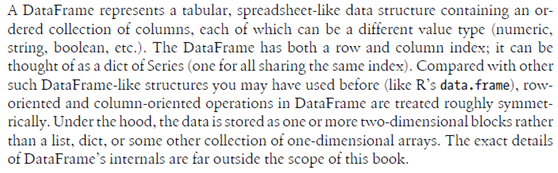

Existen numerosas formas de construir un DataFrame, de los cuales uno de los mas comunes es un diccionario de listas de igual largo o un array de NumPy:


In [104]:
data = {"state":["Ohio","Ohio","Ohio","Nevada","Nevada"],"year":[2000,2001,2002,2001,2002],"pop":[1.5,1.7,3.6,2.4,2.9]} #Creo un diccionario

In [106]:
data #Visualizo el diccionario

{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}

In [109]:
frame = DataFrame(data) #Creo un DataFrame utilizando el diccionario creado anteriormente

El DataFrame resultante puede tener el indice asignado automaticamente como es con las Series y las columnas con colocadas en lugar en orden:

In [110]:
frame #Visualizo el DataFrame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


Si se especifica una secuencia de columnas el orden resultante de las columnas del DataFrame seran exactamente las especificadas: 

In [112]:
DataFrame(data,columns=["year","state","pop"]) #Defino el orden de las columnas que quiere que tenga el DataFrame

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


Como con las Series, si se pasa una columna que no se encuentra contenida en el diccionario "data" creado al principio, esto aparecera en el DataFrame con valores NaN:

In [115]:
#Creo un DataFrame utilizando los datos del diccionario "data", especifico una secuencia de columnas y especifico una secuencia de indices

frame2 = DataFrame(data,columns=["year","state","pop","debt"],index=["one","two","three","four","five"])

In [117]:
frame2 #Visualizo el DataFrame

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


Como se observa la columna "debt" tiene todos valores NaN ya que esta columna no tiene ningun dato incluido en el diccionario "data"

In [119]:
frame2.columns #Observo las columnas del DataFrame

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [120]:
frame2.index #Observo los indices del DataFrame

Index(['one', 'two', 'three', 'four', 'five'], dtype='object')

In [121]:
frame2.values #Observo los valores del DataFrame

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, nan],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, nan],
       [2002, 'Nevada', 2.9, nan]], dtype=object)

Una columna en el DataFrame puede ser regresada como una Serie utilizando tanto la notacion tipo diccionario o por atributo:

In [123]:
frame2["state"] #Accedo a la columna "state"

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [124]:
frame2.year #Accedo a la columna "year"

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64

Se observa que la Serie retornada tiene el mismo indice que el DataFrame y su "nombre" de atributo es apropiadamente seteado:

Las filas tambien puede ser retornadas por posicion o por nombre por un par de metodos:

In [125]:
frame2.ix["three"] #Utilizo el metodo ix

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [127]:
frame2.loc["three"] #Utilizo el metodo loc (label based indexing) que permite especificar el nombre de la fila.Es mas actual que el metodo ix utilizado previamente

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [129]:
frame2.iloc[2] #Utilizo el metodo iloc (positional indexing) que permite especificar el numero posicional de la fila

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

La columnas pueden ser modificadas por asignacion. Por ejemplo la columna vacia "debt" puede ser asignada a un valor escalar o un array de valores:

In [130]:
frame2["debt"] = 16.5 #A todos los valores de la columna "debt" le asigno el valor 16.5

In [132]:
frame2 #Visualizo el array y verifico que la columna "debt" tiene asignado el valor 16.5 en cada fila

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5


In [135]:
frame2["debt"] = np.arange(5) #Asigno a la columna debt valores enteror consecutivos desde 0 a 4

In [137]:
frame2 #Visualizo el array

,year,state,pop,debt
one,2000,Ohio,1.5,0
two,2001,Ohio,1.7,1
three,2002,Ohio,3.6,2
four,2001,Nevada,2.4,3
five,2002,Nevada,2.9,4


Cuando asignamos listas o arrays a una columna el largo de los valores debe coincidir con el largo del DataFrame. Si se asigna una Serie la misma debe estar conformada exactamente con el indice del DataFrame, insertando valores perdidos en todos los agujeros:

In [138]:
val = Series([-1.2,-1-5,-1-7],index=["two","four","five"]) #Creo una serie de valores e indices

In [141]:
frame2["debt"] = val #Utilizo la Serie creada anteriormente para incorporar en la columna "debt". En las filas no incluidas en val se colocan NaN

In [143]:
frame2 #Visualizo el DataFrame

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-6.0
five,2002,Nevada,2.9,-8.0


Asignando una columna que no existe creara una nueva columna. La palabra clave "del" borrara la columna:

In [146]:
#Asigno a la nueva columna "eastern" los valores booleanos que surgen de la igualdad indicada a continuacion:

frame2["eastern"] = frame2.state == "Ohio"

In [147]:
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-6.0,False
five,2002,Nevada,2.9,-8.0,False


In [148]:
del frame2["eastern"] #Elimino la comlumna "eastern"

In [149]:
frame2 #Verifico que la columna debt se borro

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-6.0
five,2002,Nevada,2.9,-8.0


La columna retornada cuando se indexa un DataFrame es una vista, no una copia de los datos. Por lo tanto, las modificaciones realizadas a la Serie seran reflejadas en el DataFrame. La columna puede ser explicitamente copiada utilizando el metodo para la Serie "copy"

Otra forma en los cuales aparecen los datos es el formato diccionario de diccionarios:

In [165]:
pop = {"Nevada":{2001:2.4,2002:2.9},"Ohio":{2000:1.5,2001:1.7,2002:3.6}}

Si el diccionario de diccionarios es pasado a un DataFrame se interpretara de la siguiente forma:
    
a. Las claves "exteriores" de cada diccionario seran las columna del DataFrame

b. Las claves "interiores" de cada diccionario seran las filas del DataFrame

In [166]:
frame3 = DataFrame(pop) #Creo el DataFrame utilizando el diccionario de diccionarios "pop"

In [167]:
frame3 #Visualizo el DataFrame

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


Por supuesto siempre es posible trasponer los resultados:

In [168]:
frame3.T #Traspongo el DataFrame

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


Las claves en el diccionario interior son juntados y unificados para formar el indice resultante. Esto no es cierto si un indice es especificado en forma explicita:

In [169]:
DataFrame(pop, index=[2001, 2002, 2003])

AttributeError: 'list' object has no attribute 'astype'

Diccionario de Series es tratado de la misma forma:

In [170]:
pdata = {"Ohio":frame3["Ohio"][:-1],"Nevada":frame3["Nevada"][:-2]} #Diccionario de Series

In [172]:
DataFrame(pdata) #Creo un DataFrame

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,NaN


Por una lista completa que se pueden pasar para construir un DataFrame se puede observar la Tabla 5.1

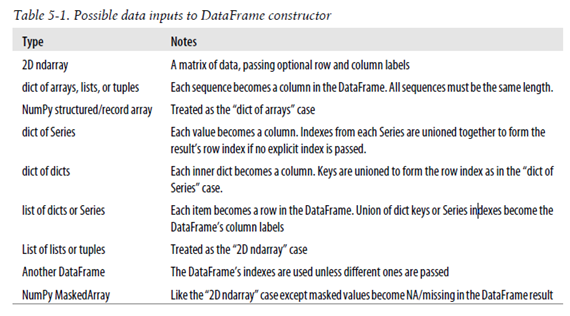

## Index Objects 

El indice de objetos de Pandas es responsable de alojar las etiquetas de ejes y otra metadata (como el/los nombres de ejes). Cualquier array o otra secuencia de etiquetas utilizadas cuando se contruye una Serie o DataFrame es internamente convertido a un indice:

In [173]:
obj = Series(range(3),index=["a","b","c"]) #Creo una Serie

In [176]:
obj #Visualizo la Serie

a    0
b    1
c    2
dtype: int64

In [174]:
index = obj.index  #Los indices de la Serie lo asigno a la variable "index"

In [175]:
index #Visualizo index

Index(['a', 'b', 'c'], dtype='object')

In [178]:
index[1:] #Visualizo una parte de index

Index(['b', 'c'], dtype='object')

Los objetos indices son inmutables y por lo tanto NO puede ser modificados por el usuario:

In [180]:
index[1] = "d" #Verifico que el indice no puede ser modificado por asignacion

TypeError: Index does not support mutable operations

La inmutabilidad es importante para que el indice pueda ser compartido en forma seguro entre las estructuras de datos:

In [183]:
index = pd.Index(np.arange(3)) #Creo una variable "indice"

In [184]:
obj2 = Series([1.5,-2.5,0], index=index) #Utilizo "indice" como indice de la Serie "obj2"

In [185]:
obj2 #Visualizo la Serie

0    1.5
1   -2.5
2    0.0
dtype: float64

In [187]:
obj2.index is index

True

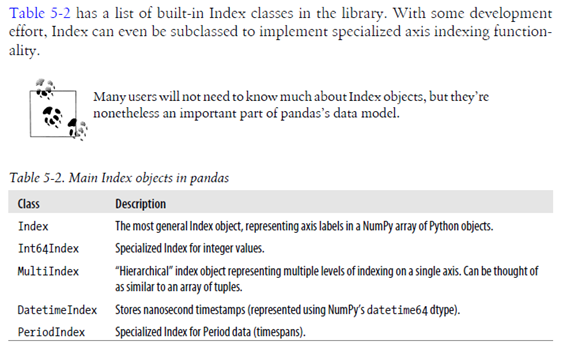

Sumado a ser un array este tambien funciona como un set de tamaño fijo:

In [188]:
frame3 #Visualizo un DataFrame anterior

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [192]:
"Ohio" in frame3.columns #¿Se encuentra "Ohio" como columna del DataFrame frame3?

True

In [193]:
2003 in frame3.index #¿Se encuentra "2003" en el indice del DataFrame frame3?

False

Cada indice tiene un numero de metodos y propiedades para seteo logico y responder otras preguntas comunes sobre los datos que contiene. Esto se encuentra listado en la Tabla 5.3

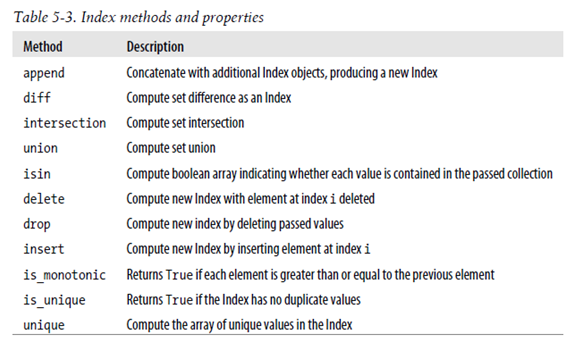